### Recommendation System

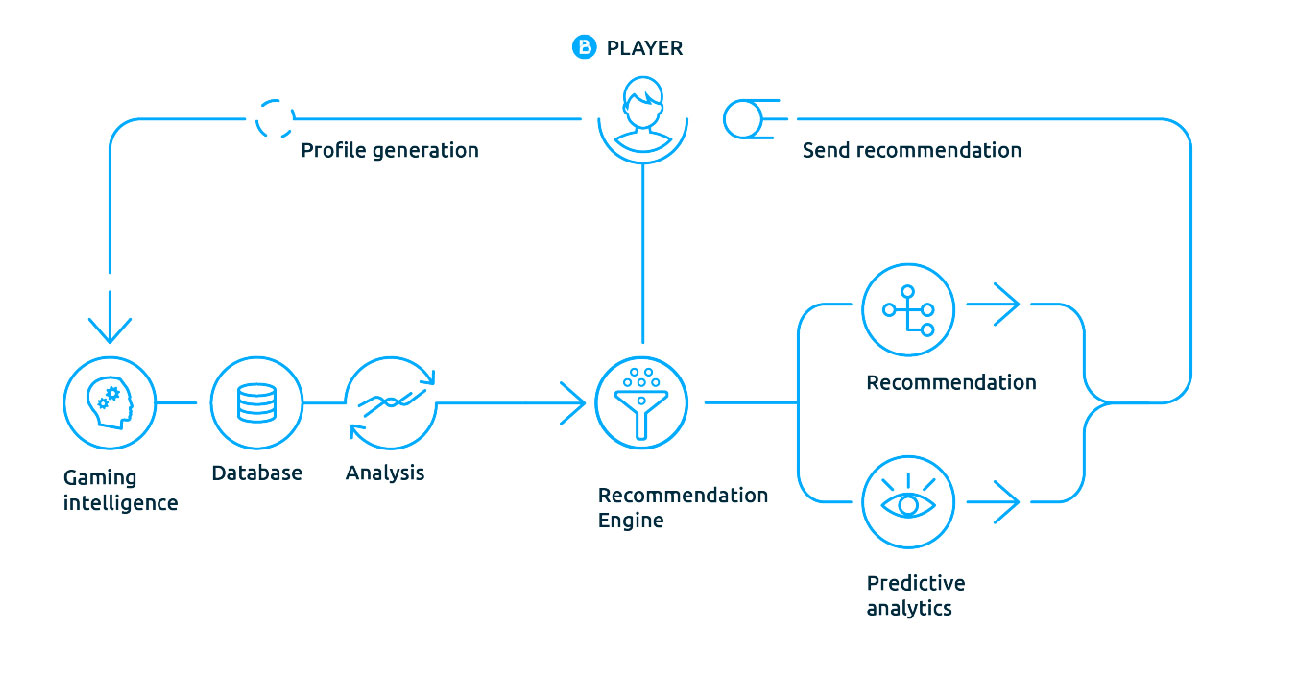

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
import math as mt
from scipy.sparse.linalg import * #used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix
from scipy.stats import skew, norm, probplot
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

In [3]:
song_data = pd.read_csv("clean_df.csv")
song_data.head()

,user,play_count,Track_Id,Song_Id,Artist_Name,Title,Song
0,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRCQXMT128E0786397,SOUVUHC12A67020E3B,Moby,Lift Me Up,Lift Me Up - Moby
1,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRIKCQI128F92DDC16,SOIPJAX12A8C141A2D,Guano Apes,Open Your Eyes,Open Your Eyes - Guano Apes
2,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRXNEZC128F42633B8,SOATCSU12A8C13393A,moe.,Happy Hour Hero,Happy Hour Hero - moe.
3,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRJSZYC128F426DBBB,SOZPZGN12A8C135B45,Bahramji & Maneesh De Moor,Dreamcatcher,Dreamcatcher - Bahramji & Maneesh De Moor
4,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRJQUWB128F14ADBF7,SOPFVWP12A6D4FC636,Michael Card,Sleep Sound In Jesus,Sleep Sound In Jesus - Michael Card


In [4]:
# cummulative sum of listen count of the songs

song_grouped = song_data.groupby(['Song',]).agg({'play_count':'count'}).sort_values('play_count', ascending=False).reset_index()
song_grouped.head(50) 

,Song,play_count
0,Sehr kosmisch - Harmonia,4801
1,Undo - BjÃ¶rk,4312
2,You're The One - Dwight Yoakam,3980
3,Dog Days Are Over (Radio Edit) - Florence + Th...,3593
4,Revelry - Kings Of Leon,3527
5,Secrets - OneRepublic,3290
6,Horn Concerto No. 4 in E flat K495: II. Romanc...,3113
7,Hey_ Soul Sister - Train,2693
8,Fireflies - Charttraxx Karaoke,2614
9,Tive Sim - Cartola,2526


In [5]:
grouped_sum = song_grouped['play_count'].sum()
song_grouped['percentage']  = song_grouped['play_count'].div(grouped_sum)*100
song_grouped.sort_values(['play_count', 'Song'], ascending = [0,1])

,Song,play_count,percentage
0,Sehr kosmisch - Harmonia,4801,0.452653
1,Undo - BjÃ¶rk,4312,0.406549
2,You're The One - Dwight Yoakam,3980,0.375247
3,Dog Days Are Over (Radio Edit) - Florence + Th...,3593,0.338759
4,Revelry - Kings Of Leon,3527,0.332537
...,...,...,...
29474,You Want - FONZIE,1,0.000094
29314,You'll Understand (Album Version) - Tarnation,1,0.000094
29507,Zaboravi - Neno Belan,1,0.000094
29411,Ã‰chame Un Cable - David Summers,1,0.000094


In [6]:
users = song_data['user'].unique()
len(users)

99681

In [7]:
songs = song_data['Song'].unique()
len(songs)

29859

In [11]:
data = song_data.copy()

Recommendation Engine
The basis of the recommendation engine is always the recorded interaction between the users and products.

Types of Recommendation Engines
The major area of distinction in different recommendation engines comes from the entity that they assume is the most important in the process of generating recommendations.

User-based recommendation engines: With the user as the central entity, the algorithm will look for similarities among users and on the basis of those similarities will come up with the recommendation.
Content-based recommendation engines: With the content that we are trying to recommend as central entity, the algorithm will attempt to find features about the content and find similar content. Then these similarities will be used to make recommendations to the end users.
Hybrid-recommendation engines: Sometimes termed as collaborative filtering recommendation engines, these are one of the most effective classes of recommendation engines, as they take the best features of both classes, users and content of recommendation engines.

Popularity-Based Recommendation Engine
The most simplest recommendation engine is the Popularity-Based, that basically standing, if some item is liked by a vast majority of our user base, then it is a good idea to recommend that item to users who have not interacted with that item. The code to develop this kind of recommendation is extremely easy and is effectively just a summarization procedure that determine which items of the content have the most users and then that will become our standard recommendation set for each user.

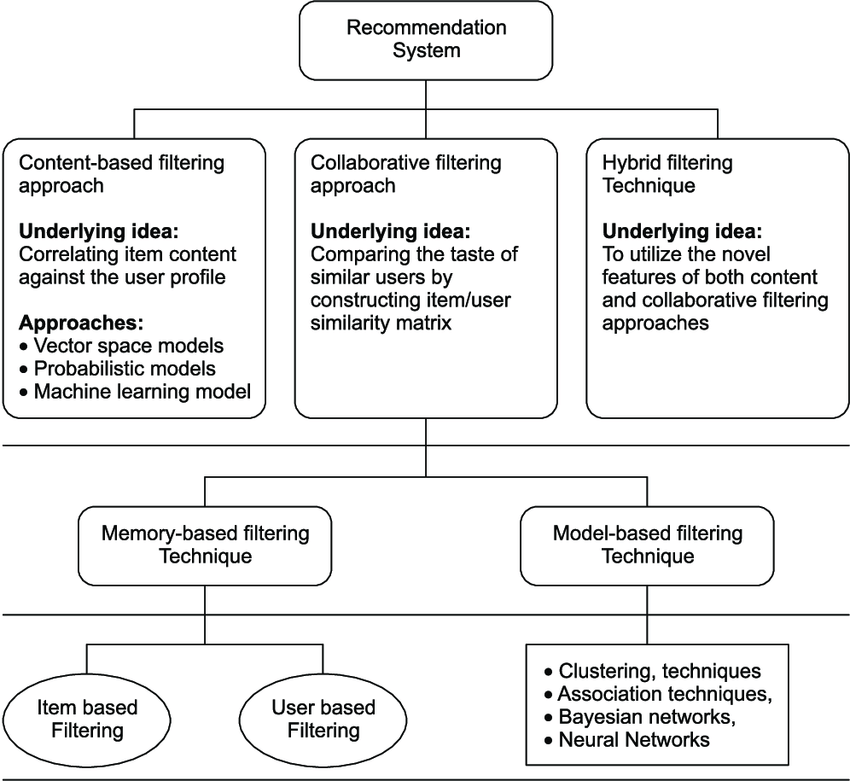

## 1. Popularity-Based Recommenndation System

It is a type of recommendation system which works on the principle of popularity and or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.

 

For example, if a product is often purchased by most people then the system will get to know that that product is most popular so for every new user who just signed it, the system will recommend that product to that user also and chances becomes high that the new user will also purchase that. 

 **Merits of popularity based recommendation system**
 
* It does not suffer from cold start problems which means on day 1 of the business also it can recommend products on various different filters.

* There is no need for the user's historical data.

 

 **Demerits of popularity based recommendation system**
 

* Not personalized 

* The system would recommend the same sort of products/movies which are solely based upon popularity to every other user.

 

 **Example**
 

* Google News: News filtered by trending and most popular news.

* YouTube: Trending videos.

For more to learn, you can look at Google News which is filtered by popular and trending news here.
https://news.google.com/topstories?hl=en-IN&gl=IN&ceid=IN%3Aen

For more detail about Recommendation system : https://getintorecommendation.blogspot.com/

**Cold start** happens when new users or new items arrive in e-commerce platforms. Classic recommender systems like collaborative filtering assumes that each user or item has some ratings so that we can infer ratings of similar users/items even if those ratings are unavailable. However, for new users/items, this becomes hard because we have no browse, click or purchase data for them. As a result, we cannot “fill in the blank” using typical matrix factorization techniques.

Fortunately, researchers have proposed various ways to tackle this cold start problem.

Approaches
* Representative based: use subset of items and users that represents the population
* Content based: use side information such as text, social networks, etc.
* Bandit: consider the exploration vs exploitation tradeoffs in new items.
* Deep learning: recent methods that tries to solve some of the issues tackled above but using a black box.

In [23]:
def create_popularity_recommendation(data, user, Song_Id, n=10):
    #Get a count of user_ids for each unique song as recommendation score
    data_grouped = data.groupby([Song_Id]).agg({user: 'count'}).reset_index()
    data_grouped.rename(columns = {user: 'score'},inplace=True)
    
    #Sort the songs based upon recommendation score
    data_sort = data_grouped.sort_values(['score', Song_Id], ascending = [0,1])
    
    #Generate a recommendation rank based upon score
    data_sort['Rank'] = data_sort.score.rank(ascending=False, method='first')
        
    #Get the top n recommendations
    popularity_recommendations = data_sort.head(n)
    return popularity_recommendations

In [25]:
recommendations = create_popularity_recommendation(data,'user','Title', 20)
display(recommendations)

,Title,score,Rank
19705,Sehr kosmisch,4801,1.0
25174,Undo,4312,2.0
27347,You're The One,4082,3.0
5673,Dog Days Are Over (Radio Edit),3593,4.0
18759,Revelry,3527,5.0
19666,Secrets,3292,6.0
9828,Horn Concerto No. 4 in E flat K495: II. Romanc...,3113,7.0
9551,Hey_ Soul Sister,2693,8.0
7462,Fireflies,2619,9.0
24384,Tive Sim,2526,10.0


We can use our popularity recommendation function to find the 20 artists recommendations too.

In [26]:
display(create_popularity_recommendation(song_data,'user','Artist_Name', 20))

,Artist_Name,score,Rank
1859,Coldplay,11736,1.0
4873,Kings Of Leon,8086,2.0
3163,Florence + The Machine,7912,3.0
4623,Justin Bieber,7368,4.0
4051,Jack Johnson,6571,5.0
8484,The Black Keys,6288,6.0
9432,Train,6288,7.0
2816,Eminem,5970,8.0
6552,OneRepublic,5773,9.0
6172,Muse,5551,10.0


## 2. Content-Based Recommendation System


It is another type of recommendation system which works on the principle of similar content. If a user is watching a movie, then the system will check about other movies of similar content or the same genre of the movie the user is watching. There are various fundamentals attributes that are used to compute the similarity while checking about similar content. 

**Cosine Similarity:**

Cosine of the angle between the two vectors of the item, vectors of A and B is calculated for imputing similarity. If the vectors are closer, then small will be the angle and large will be the cosine
$$ Similarity(X,Y) = \frac{X.Y}{|X|*|Y|} $$

**Jaccard Similarity:**

Users who have rated item A and B divided by the total number of users who have rated either A or B gives us the similarity. It is used for comparing the similarity.

**Merits**
* There is no requirement for much of the user’s data.

* We just need item data that enable us to start giving recommendations to users.

* A content-based recommender engine does not depend on the user’s data, so even if a new user comes in, we can recommend the user as long as we have the user data to build his profile.

* It does not suffer from a cold start.

 

**Demerits**
 

* Items data should be in good volume.

* Features should be available to compute the similarity.

### Item Similarity Based Recommendation Engine
To provide a more personal recommendation to the user we need apply a recommendation engine that consider some kind of similarities between users and theirs items. In other words, it is a recommendation engine based on calculating similarities between a user's items and the other items in our dataset. Usually to define similarity among a set of items, we need a feature set on the basis of which both items can be described. In our case it will mean features of the songs on the basis of which one song can be differentiated from another.

Since our dataset don't have this data, we can use the the Jaccard index to do an implicit similarity, based on common users, in terms of the users who listen to these songs. The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets:

$$J(A,B) = \frac{|A\cap B|}{|A\cup B|} = \frac{|A\cap B|}{|A|+|B|-|A\cap B|}$$


The basic idea remains that if two songs are being listened to by a large fraction of common users out of the total listeners, the two songs can be said to be similar to each other.

So, we need calculate the similarity of each song in the user's list to those in our dataset, using the similarity metric defined previously, but we need attention to it can become a computation-intensive step when we have a large number of songs. To make the computation more feasible,probably you use a cluster or, in our case, we limited ours items to the most popular 5,000 songs so it is quite unlikely that we would miss out on any important recommendations.

In [27]:
total_play_count = sum(song_data.play_count)
play_count = song_data[['Song_Id', 'play_count']].groupby('Song_Id').sum().\
             sort_values(by='play_count',ascending=False).head(5000)

print('5,000 most popular songs represents {:3.2%} of total listen.'.format(float(play_count.sum())/total_play_count))

song_subset = list(play_count.index[:5000])
user_subset = list(song_data.loc[song_data.Song_Id.isin(song_subset), 'user'].unique())
user_song_list_count_sub = song_data[song_data.Song_Id.isin(song_subset)]
display(user_song_list_count_sub.head())

5,000 most popular songs represents 63.67% of total listen.


,user,play_count,Track_Id,Song_Id,Artist_Name,Title,Song
0,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRCQXMT128E0786397,SOUVUHC12A67020E3B,Moby,Lift Me Up,Lift Me Up - Moby
1,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRIKCQI128F92DDC16,SOIPJAX12A8C141A2D,Guano Apes,Open Your Eyes,Open Your Eyes - Guano Apes
9,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRSROOS12903CE26FD,SONJVYU12A8AE44F9E,Jamiroquai,Little L,Little L - Jamiroquai
13,9be82340a8b5ef32357fe5af957ccd54736ece95,1,TRZPSWK128F4243514,SOFEGST12A58A7D682,Vampire Weekend,Oxford Comma (Album),Oxford Comma (Album) - Vampire Weekend
15,9be82340a8b5ef32357fe5af957ccd54736ece95,1,TRQAKCH12903CB2C5A,SOFIPHI12AAF3B3DB2,The Luniz,I Got 5 On It,I Got 5 On It - The Luniz


In [12]:
train_data, test_data = train_test_split(song_data, test_size = 0.20, random_state=0)
print(train_data.head(5))

                                            user  play_count  \
935987  ee6d4e54cdf624be264f848e82e6f7d12e42954b           1   
908593  ca0169c4cd73a6217afc94a53e351df8cd9d435d           2   
353132  7e83d1b4cafd5c225dc977bd0b2ce7a0a0698abc           1   
580957  f6b455bf90de87683ad8ed2891c991cdbcac9dd7          15   
432761  e503ab9cee40caf37ae0c44683a7f305212d5d1b           2   

                  Track_Id             Song_Id            Artist_Name  \
935987  TRGWDJS128F1491B7A  SOXJUZJ12A6D4FB144   Bring Me The Horizon   
908593  TRLLHWY128F9320B21  SOGVUXE12A8C13D6FB   Atom And His Package   
353132  TRNMKIK128F1465AE5  SOIMDZL12A6D4F6EB1  Bill & Gloria Gaither   
580957  TRRZNPI128F147D9CF  SOXVQQQ12A58A78325            Chris Isaak   
432761  TRUUUMU128F4277908  SOGOPZL12A8C13CC50          Jorge Drexler   

                                               Title  \
935987                              A Lot Like Vegas   
908593                       What We Do On Christmas   
353132  

In [13]:

        
##Class for Popularity based Recommender System model
##class popularity_recommender_py():
    #def __init__(self):
        #self.train_data = None
        #self.user_id = None
        #self.item_id = None
        #self.popularity_recommendations = None
        
    ##Create the popularity based recommender system model
    #def create(self, train_data, user, Song_Id):
        #self.train_data = train_data
        #self.user_id = user
        #self.item_id = Song_Id

        ##Get a count of user_ids for each unique song as recommendation score
        #train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        #train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #####Sort the songs based upon recommendation score
        #train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        ###Generate a recommendation rank based upon score
        #train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        #Get the top 10 recommendations
        #self.popularity_recommendations = train_data_sort.head(10)

        ###Use the popularity based recommender system model to
    ####make recommendations
    #def recommend(self, user):    
        #user_recommendations = self.popularity_recommendations
        
        ###Add user_id column for which the recommendations are being generated
        #user_recommendations['user_id'] = user
    
        ###Bring user_id column to the front
        #cols = user_recommendations.columns.tolist()
        #cols = cols[-1:] + cols[:-1]
        #user_recommendations = user_recommendations[cols]
        
        #return user_recommendations

In [41]:


class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, Song):
        item_data = self.train_data[self.train_data[self.item_id] == Song]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
    
        #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
            
             ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
        
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
                return cooccurence_matrix
            
            
      #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user, Song_Id):
        self.train_data = train_data
        self.user_id = user
        self.item_id = Song_Id                       #......................................................................

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

For more detail of Co occurance matrix: https://getintorecommendation.blogspot.com/2021/06/co-occurance-matrix.html

In [83]:
is_model = item_similarity_recommender_py()
is_model.create(user_song_list_count_sub, 'user', 'Title')
user_id = list(user_song_list_count_sub.user)[12]
user_items = is_model.get_user_items(user_id)

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

No. of unique songs for the user: 4
no. of unique songs in the training set: 4875
Non zero values in cooccurence_matrix :1


,user_id,song,score,rank
0,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Lift Me Up,0.000437,1
1,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Drop The Hammer (Album Version),0.000000,2
2,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Christian Resistance,0.000000,3
3,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Baby Hold On,0.000000,4
4,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Dissembler,0.000000,5
5,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Meine Tote Russische Freundin,0.000000,6
6,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Back To Allentown,0.000000,7
7,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Beating Like A Drum,0.000000,8
8,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Don't Marry Her,0.000000,9
9,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Suzanne,0.000000,10


As you can see, although the algorithms seem to have done a good job of customizing the recommendations, it is clear that we can improve them, so we go to the next recommendation system a bit more complex.

## 3. Collaborative Filtering
 

It is considered to be one of the very smart recommender systems that work on the similarity between different users and also items that are widely used as an e-commerce website and also online movie websites. It checks about the taste of similar users and does recommendations. 

 

The similarity is not restricted to the taste of the user moreover there can be consideration of similarity between different items also. The system will give more efficient recommendations if we have a large volume of information about users and items.

**This is the way collaborative filtering works. Mainly, there are two approaches used in collaborative filtering stated below;**

### a) User-based nearest-neighbor collaborative filtering
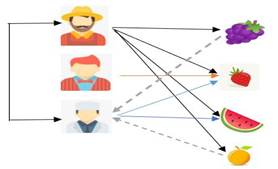

This Figure shows user X, Y, and Z respectively. The system checks the items that are similar to the items the user bought. The similarity between different items is computed based on the items and not the users for the prediction. Users X and Y both purchased items A and B so they are found to have similar tastes.

### b) Item-based nearest-neighbor collaborative filtering
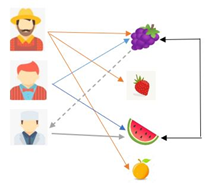

This Figure shows user X, Y, and Z respectively. The system checks the items that are similar to the items the user bought. The similarity between different items is computed based on the items and not the users for the prediction. Users X and Y both purchased items A and B so they are found to have similar tastes.

**Limitations**
 

* Enough users required to find a match. To overcome such cold start problems, often hybrid approaches are made use of between CF and Content-based matching.

* Even if there are many users and many items that are to be recommended often, problems can arise of user and rating matrix to be sparse and will become challenging to find out about the users who have rated the same item.

* The problem in recommending items to the user due to sparsity problems.

## c) Singular value decomposition and matrix-factorization
 

Singular value decomposition also known as the SVD algorithm is used as a collaborative filtering method in recommendation systems. SVD is a matrix factorization method that is used to reduce the features in the data by reducing the dimensions from N to K where (K<N). 

 

For the part of the recommendation, the only part which is taken care of is matrix factorization that is done the user-item rating matrix. Matrix-factorization is all about taking 2 matrices whose product is the original matrix. Vectors are used to represent item ‘qi’ and user ‘pu’ such that their dot product is the expected rating. 

## Matrix factorization based recommendations

Matrix factorization based recommendation engines) are probably the most used recommendation engines when it comes to implementing recommendation engines in production.

Matrix factorization are methods that reduce a matrix into constituent parts, such that when these matrices are multiplied we get the original matrix. It make it easier to calculate more complex matrix operations. Matrix factorization methods, also called matrix decompositions methods, are a foundation of linear algebra in computers, even for basic operations such as solving systems of linear equations, calculating the inverse, and calculating the determinant of a matrix.

Matrix factorization can be used to discover latent features between two different kinds of entities. For example, we can try to explain a song in mathematical terms by measuring its beats, tempo, and other such features and then define similar features in terms of the user. Once we have consciously defined such "features", we can use them to find matches for a user based on some similarity criteria. You can use matrix factorization to discover these latent features and they seem to work great.

The starting point of any matrix factorization-based method is the utility matrix, a matrix of user Vs item dimension. Not, this is a sparse matrix, since not all item is used by the user. The process of matrix factorization means finding out a low rank approximation of the utility matrix. So we want to break down the utility matrix U into two low rank matrices so that we can recreate the matrix U by multiplying those two matrices:

Assuming the process helps us identify latent factors/features, meaning as K, our aim is to find two matrices X and Y such that their product (matrix multiplication) approximates R.

X = |U| x K matrix (A matrix with dimensions of num_users * factors)

Y = |P| x K matrix (A matrix with dimensions of factors * num_songs)

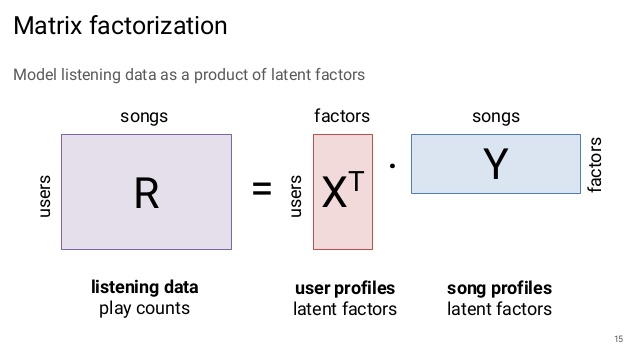

To make a recommendation to the user, we can multiply the corresponding user's row from the first matrix by the item matrix and determine the items from the row with maximum ratings. That will become our recommendations for the user. The first matrix represents the association between the users and the latent features, while the second matrix takes care of the associations between items (songs in our case) and the latent features.

**Matrix Factorization and Singular Value Decomposition (SVD)**
<p>There are multiple algorithms available for determining factorization of any matrix. We use one of the simplest algorithms, which is the singular value decomposition or SVD. You can follow these steps to determine the factorization of a matrix using the output of SVD function.

Factorize the matrix to obtain U, S, and V matrices.
Reduce the matrix S to first k components. (The function we are using will only provide k dimensions, so we can skip this step.)
Compute the square root of reduced matrix $S_k$ to obtain the matrix $S_k^{1/2}$.
Compute the two resultant matrix $U*S_k{1/2}$ and $S_k^{1/2}*V$ as these will serve as our two factorized matrices
We can then generate the prediction of user i for product j by taking the dot product of the ith row of the first matrix with the jth column of the second matrix.

Let's create tree functions to help us on it:

* **compute_svd:** It use the svds function provided by the scipy library to break down our utility matrix into three different matrices, and prosed with the others tree steps above.
* **compute_estimated_matrix:** use the decomposed matrices by SVD and provide the predictions.

In [58]:
def compute_svd(urm, K):
    U, s, Vt = svds(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

def compute_estimated_matrix(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 
    max_recommendation = 250
    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    recomendRatings = np.zeros(shape=(MAX_UID,max_recommendation ), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recomendRatings[userTest, :] = (-estimatedRatings[userTest, :]).argsort()[:max_recommendation]
    return recomendRatings

def show_recomendations(uTest, num_recomendations = 10):
    for user in uTest:
        print('-'*70)
        print("Recommendation for user id {}".format(user))
        rank_value = 1
        i = 0
        while (rank_value <  num_recomendations + 1):
            so = uTest_recommended_items[user,i:i+1][0]
            if (small_set.user[(small_set.so_index_value == so) & (small_set.us_index_value == user)].count()==0):
                song_details = small_set[(small_set.so_index_value == so)].\
                    drop_duplicates('so_index_value')[['Title','Artist_Name']]
                print("The number {} recommended song is {} BY {}".format(rank_value, 
                                                                      list(song_details['Title'])[0],
                                                                      list(song_details['Artist_Name'])[0]))
                rank_value+=1
            i += 1

The first thing that we notice is that we have no concept of "rating" in our data. All we have are the play counts of various songs. This is a well known problem in the case of recommendation engines and is called the "implicit feedback" problem. There are many ways to solve this problem but we will look at a very simple and intuitive solution. We will replace the play count with a fractional play count. The logic being that this will measure the strength of "likeness" for a song in the range of [0,1].

In [84]:
song_data

,user,play_count,Track_Id,Song_Id,Artist_Name,Title,Song
0,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRCQXMT128E0786397,SOUVUHC12A67020E3B,Moby,Lift Me Up,Lift Me Up - Moby
1,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRIKCQI128F92DDC16,SOIPJAX12A8C141A2D,Guano Apes,Open Your Eyes,Open Your Eyes - Guano Apes
2,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRXNEZC128F42633B8,SOATCSU12A8C13393A,moe.,Happy Hour Hero,Happy Hour Hero - moe.
3,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRJSZYC128F426DBBB,SOZPZGN12A8C135B45,Bahramji & Maneesh De Moor,Dreamcatcher,Dreamcatcher - Bahramji & Maneesh De Moor
4,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRJQUWB128F14ADBF7,SOPFVWP12A6D4FC636,Michael Card,Sleep Sound In Jesus,Sleep Sound In Jesus - Michael Card
...,...,...,...,...,...,...,...
1060630,5e650759ebf89012044c6d52121eeada8b0ec814,1,TRPLXFD128F1454961,SOVLNXV12A6D4F706E,Mos Def,Ms. Fat Booty,Ms. Fat Booty - Mos Def
1060631,5e650759ebf89012044c6d52121eeada8b0ec814,2,TRRBUQL12903CCE501,SOVDSJC12A58A7A271,Sam Cooke,Ain't Misbehavin,Ain't Misbehavin - Sam Cooke
1060632,5e650759ebf89012044c6d52121eeada8b0ec814,2,TRHNKAU128F9300856,SOBRHVR12A8C133F35,Southside Spinners,Luvstruck,Luvstruck - Southside Spinners
1060633,5e650759ebf89012044c6d52121eeada8b0ec814,2,TRDULYN128F4248762,SOMGVYU12A8C1314FF,J. Karjalainen & Mustat Lasit,Sinisten tÃ¤htien alla,Sinisten tÃ¤htien alla - J. Karjalainen & Must...


In [59]:
user_song_list_listen = song_data[['user','play_count']].groupby('user').sum().reset_index()
user_song_list_listen.rename(columns={'play_count':'total_play_count'},inplace=True)
user_song_list_count_merged = pd.merge(song_data,user_song_list_listen)
user_song_list_count_merged['fractional_play_count'] = \
    user_song_list_count_merged['play_count']/user_song_list_count_merged['total_play_count']

display(user_song_list_count_merged[user_song_list_count_merged.user =='841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8']\
        [['user','Song_Id','play_count','fractional_play_count']].head())

,user,Song_Id,play_count,fractional_play_count
18,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,SORVQZE12A58A7AE98,1,0.047619
19,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,SOXPJVO12A6D4FCC69,2,0.095238
20,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,SOQMFWG12AB0186AD8,2,0.095238
21,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,SOAYGQW12AB017D6FA,1,0.047619
22,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,SOUIROO12A8C139C18,1,0.047619


The next transformation of data that is required is to convert our dataframe into a numpy matrix in the format of utility matrix. We will convert our dataframe into a sparse matrix, as we will have a lot of missing values and sparse matrices are suitable for representation of such a matrix. Since we won't be able to transform our song IDs and user IDs into a numpy matrix, we will convert these indices into numerical indices. Then we will use these transformed indices to create our sparse numpy matrix.

In [60]:
user_codes = user_song_list_count_merged.user.drop_duplicates().reset_index()
user_codes.rename(columns={'index':'user_index'}, inplace=True)
user_codes['us_index_value'] = list(user_codes.index)

song_codes = user_song_list_count_merged.Song_Id.drop_duplicates().reset_index()
song_codes.rename(columns={'index':'song_index'}, inplace=True)
song_codes['so_index_value'] = list(song_codes.index)

small_set = pd.merge(user_song_list_count_merged,song_codes,how='left')
small_set = pd.merge(small_set,user_codes,how='left')
mat_candidate = small_set[['us_index_value','so_index_value','fractional_play_count']]

data_array = mat_candidate.fractional_play_count.values
row_array = mat_candidate.us_index_value.values
col_array = mat_candidate.so_index_value.values

data_sparse = coo_matrix((data_array, (row_array, col_array)),dtype=float)

display(data_sparse)

print('User used to performed the item similarity based recommendations earlie:.')
display(user_codes[user_codes.user =='841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8'])

<99681x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 1060635 stored elements in COOrdinate format>

User used to performed the item similarity based recommendations earlie:.


,user_index,user,us_index_value
2,18,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,2


Once we have converted our matrix into a sparse matrix, we specify 50 as the number of latent factors we want to factorize our data and call ours functions first to compute the SVD, followed by the compute estimated matrix for the users ids sets by uTest variable:

**Note:** In recommender systems, we typically work with very sparse matrices as the item universe is very large while a single user typically interacts with a very small subset of the item universe.

In [85]:
song_data.head(20)

,user,play_count,Track_Id,Song_Id,Artist_Name,Title,Song
0,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRCQXMT128E0786397,SOUVUHC12A67020E3B,Moby,Lift Me Up,Lift Me Up - Moby
1,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRIKCQI128F92DDC16,SOIPJAX12A8C141A2D,Guano Apes,Open Your Eyes,Open Your Eyes - Guano Apes
2,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRXNEZC128F42633B8,SOATCSU12A8C13393A,moe.,Happy Hour Hero,Happy Hour Hero - moe.
3,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRJSZYC128F426DBBB,SOZPZGN12A8C135B45,Bahramji & Maneesh De Moor,Dreamcatcher,Dreamcatcher - Bahramji & Maneesh De Moor
4,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRJQUWB128F14ADBF7,SOPFVWP12A6D4FC636,Michael Card,Sleep Sound In Jesus,Sleep Sound In Jesus - Michael Card
5,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRXRJTW12903CBB252,SOHEKND12A8AE481D0,Jamiroquai,Space Cowboy,Space Cowboy - Jamiroquai
6,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TROSGNL128F428507B,SODSKZZ12AB0188524,Guano Apes,Rain,Rain - Guano Apes
7,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRXLOMK128F9313217,SONZTNP12A8C1321DF,Skunk Anansie,She's My Heroine,She's My Heroine - Skunk Anansie
8,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRIPTHE12903CF219F,SOMLKZO12AB017F4AE,Skinlab,Bullet With Butterfly Wings (smashing Pumpkins...,Bullet With Butterfly Wings (smashing Pumpkins...
9,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRSROOS12903CE26FD,SONJVYU12A8AE44F9E,Jamiroquai,Little L,Little L - Jamiroquai


In [61]:
display(user_codes[user_codes.user =='9be82340a8b5ef32357fe5af957ccd54736ece95'])

,user_index,user,us_index_value
1,11,9be82340a8b5ef32357fe5af957ccd54736ece95,1


In [63]:
K=50
urm = data_sparse
#MAX_PID = urm.shape[1]              
#MAX_UID = urm.shape[0]

U, S, Vt = compute_svd(urm, K)
uTest = [2,4,5,6,7,8,873,23]

uTest_recommended_items = compute_estimated_matrix(urm, U, S, Vt, uTest, K, True)

show_recomendations(uTest)

----------------------------------------------------------------------
Recommendation for user id 2
The number 1 recommended song is Teach Me How To Dougie BY California Swag District
The number 2 recommended song is The Maestro BY Beastie Boys
The number 3 recommended song is Sayonara-Nostalgia BY Base Ball Bear
The number 4 recommended song is Somebody To Love BY Justin Bieber
The number 5 recommended song is Alejandro BY Lady GaGa
The number 6 recommended song is Billionaire [feat. Bruno Mars]  (Explicit Album Version) BY Travie McCoy
The number 7 recommended song is Drop The World BY Lil Wayne / Eminem
The number 8 recommended song is Soap Bar BY Goldie Lookin Chain
The number 9 recommended song is Greece 2000 BY Three Drives
The number 10 recommended song is I Gotta Feeling BY Black Eyed Peas
----------------------------------------------------------------------
Recommendation for user id 4
The number 1 recommended song is Behind The Sea [Live In Chicago] BY Panic At The Disco
The

# Let's see some different Approaches of Collaborative Filtering 

### Memory_User_Based_RS_PD

In [22]:
from sklearn import preprocessing
from sklearn.metrics.pairwise import pairwise_distances 

In [152]:
song_data1 = song_data[['user', 'Song_Id', 'play_count', 'Title']]

In [153]:
song_data1.head(2)

,user,Song_Id,play_count,Title
0,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,Lift Me Up
1,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,Open Your Eyes


In [154]:
song_data2 = song_data1.copy()

In [155]:
song_data1 = song_data1[:200000]


In [26]:
encoding_user_song = preprocessing.OrdinalEncoder()
song_data1['user_id'] = encoding_user_song.fit_transform(song_data1[['user']])
song_data1['song_id'] = encoding_user_song.fit_transform(song_data1[['Song_Id']])

In [27]:
song_data1['user_id'] = song_data1['user_id'].astype('int')
song_data1['song_id'] = song_data1['song_id'].astype('int')

In [28]:
train, test = train_test_split(song_data1, test_size=0.20, random_state=31)

In [29]:
train.head(2)

,user,Song_Id,play_count,Title,user_id,song_id
147986,be239a94479dc096e83b97b576234255eaa133f9,SOHHALP12A6D4FB6A8,1,Patience,14032,7738
114011,ac19cbe4bf3022654265ce776a15938cbc0b79cf,SORRCNC12A8C13FDA9,4,Is This It,12671,18538


In [30]:
song_data1.shape

(200000, 6)

In [31]:
print(train.shape, test.shape)

(160000, 6) (40000, 6)


In [32]:
n_users = song_data1.user.nunique()
n_items = song_data1.Song_Id.nunique()

In [33]:
print(n_users, n_items)

18728 26526


### User based Recommendation system 

#### Create empty data matrix: user*song 

In [34]:
data_matrix = np.zeros((n_users, n_items))

In [35]:
for line in train.itertuples():
    data_matrix[line[5]-1, line[6]-1] = line[3]

In [36]:
data_matrix.shape

(18728, 26526)

#### Pairwise distance with cosine metric 

In [37]:
user_similarity = 1 - pairwise_distances(data_matrix, metric='cosine')

In [38]:
np.unique(user_similarity)

array([0.00000000e+00, 9.26165671e-06, 9.94035507e-06, ...,
       9.99599664e-01, 9.99867701e-01, 1.00000000e+00])

In [40]:
user_similarity.shape

(18728, 18728)

#### Dot product of Data Matrix with User similarity

In [41]:
item_prediction = np.dot(user_similarity, data_matrix)
item_prediction.shape

(18728, 26526)

In [42]:
prediction_df = pd.DataFrame(item_prediction)
prediction_df.shape

(18728, 26526)

In [43]:
prediction_df[10].value_counts()

0.000000    17025
0.057831        9
0.435143        8
0.037450        8
0.034280        7
            ...  
0.773791        1
1.703712        1
0.458395        1
0.016873        1
3.497949        1
Name: 10, Length: 1382, dtype: int64

In [45]:
user = 'd7083f5e1d50c264277d624340edaaf3dc16095b'
user_id = song_data1['user_id'][song_data['user']==user]
user = user_id[0]

In [46]:
user

15842

In [47]:
prediction_df.iloc[user].sort_values(ascending=False)[:10]

24163    316.042715
17976    112.939439
15842     62.173673
857       55.024205
5286      35.232632
1639      32.500331
15805     30.762976
4467      29.998199
3264      29.635254
14217     25.240216
Name: 15842, dtype: float64

In [48]:
recommended_songs_df = pd.DataFrame(prediction_df.iloc[user].sort_values(ascending=False)[:10])

In [49]:
recommended_songs_df.reset_index(inplace=True)
recommended_songs_df.columns = ['song_id', 'score']

In [51]:
song_data2 = song_data1[['Song_Id', 'song_id', 'Title']].copy()

In [52]:
merged = pd.merge(recommended_songs_df, song_data2, how='left', on='song_id')

In [53]:
merged.drop_duplicates(inplace=True)

In [54]:
merged.reset_index(drop=True)

,song_id,score,Song_Id,Title
0,24163,316.042715,SOXLOKM12AB018638B,Vampires
1,17976,112.939439,SORBBDO12A8AE47AEE,Hateful
2,15842,62.173673,SOOYCVU12A6D4F9989,PASSIVE ATTACK (RADIO EDIT)
3,857,55.024205,SOAUWWV12AF729E642,The Blue Notebooks
4,5286,35.232632,SOEYUSD12A58A7BDA4,All In My Head
5,1639,32.500331,SOBOMOX12AB017F9CF,Rapture at Sea
6,15805,30.762976,SOOXKRQ12A58A7899A,Sunshine (Love Like That)
7,4467,29.998199,SOEDWCI12A6D4FB05A,Going Home (For A Time Like This Album Version)
8,3264,29.635254,SODBMPN12A6D4FB71D,Amanes
9,14217,25.240216,SONJVYU12A8AE44F9E,Little L


### Normalize the score 

In [55]:
merged['score_normalized'] = (merged['score'] - min(merged['score'])) / (max(merged['score']) - min(merged['score']))

In [56]:
merged

,song_id,score,Song_Id,Title,score_normalized
0,24163,316.042715,SOXLOKM12AB018638B,Vampires,1.000000
3,17976,112.939439,SORBBDO12A8AE47AEE,Hateful,0.301577
5,15842,62.173673,SOOYCVU12A6D4F9989,PASSIVE ATTACK (RADIO EDIT),0.127005
14,857,55.024205,SOAUWWV12AF729E642,The Blue Notebooks,0.102420
21,5286,35.232632,SOEYUSD12A58A7BDA4,All In My Head,0.034362
23,1639,32.500331,SOBOMOX12AB017F9CF,Rapture at Sea,0.024966
30,15805,30.762976,SOOXKRQ12A58A7899A,Sunshine (Love Like That),0.018991
31,4467,29.998199,SOEDWCI12A6D4FB05A,Going Home (For A Time Like This Album Version),0.016362
39,3264,29.635254,SODBMPN12A6D4FB71D,Amanes,0.015113
43,14217,25.240216,SONJVYU12A8AE44F9E,Little L,0.000000


### Evaluation 

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt

### MAE

In [58]:
def mae(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()]
    ground_truth = ground_truth[ground_truth.nonzero()]
    return mean_absolute_error(prediction, ground_truth)

In [59]:
mae(item_prediction,data_matrix)

35.95890686538224

### RMSE

In [60]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()]
    ground_truth = ground_truth[ground_truth.nonzero()]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [61]:
rmse(item_prediction,data_matrix)

186.43082010855608

### Precision@K 

In [62]:
user_index=550

In [115]:
song_data1.shape

(200000, 6)

In [63]:
song_data1.head()

,user,Song_Id,play_count,Title,user_id,song_id
0,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,Lift Me Up,15842,21618
1,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,Open Your Eyes,15842,9139
2,d7083f5e1d50c264277d624340edaaf3dc16095b,SOATCSU12A8C13393A,1,Happy Hour Hero,15842,790
3,d7083f5e1d50c264277d624340edaaf3dc16095b,SOZPZGN12A8C135B45,1,Dreamcatcher,15842,26165
4,d7083f5e1d50c264277d624340edaaf3dc16095b,SOPFVWP12A6D4FC636,1,Sleep Sound In Jesus,15842,16133


In [64]:
song_data1[song_data1['user_id']==user_index]

,user,Song_Id,play_count,Title,user_id,song_id
169059,0829d8321222e42b501d026e7ca788628ff40182,SOLGLZI12AB018AE8B,2,Violent Dreams,550,11968
169060,0829d8321222e42b501d026e7ca788628ff40182,SOMQCVJ12AB018AE7F,1,Empathy,550,13383
169061,0829d8321222e42b501d026e7ca788628ff40182,SOSGSEZ12AB01867B3,1,The Recluse,550,19113
169062,0829d8321222e42b501d026e7ca788628ff40182,SOTBRIU12A8C13ED4F,1,1991,550,19913
169063,0829d8321222e42b501d026e7ca788628ff40182,SOMHOXK12AB018CB0D,1,Stay Too Long,550,13057
169064,0829d8321222e42b501d026e7ca788628ff40182,SOJGSYF12AB018CB01,1,Love Goes Down,550,9845
169065,0829d8321222e42b501d026e7ca788628ff40182,SOIQLVZ12AB018AE9C,2,Pap Smear,550,9190


In [65]:
user_relevant_set = song_data1[song_data1['user_id']==user_index].sort_values(by='play_count', ascending=False)['song_id'].tolist()

In [66]:
user_relevant_set

[11968, 9190, 13383, 19113, 19913, 13057, 9845]

In [67]:
len(user_relevant_set)

7

In [68]:
user_predicted_set = prediction_df.iloc[user_index].sort_values(ascending=False)[:10].index.tolist()

In [69]:
user_predicted_set

[8411, 857, 21175, 924, 18507, 11134, 7068, 16722, 2167, 22543]

In [70]:
len(user_predicted_set)

10

In [71]:
len(list(set(user_relevant_set) & set(user_predicted_set)))

0

In [72]:
precision_at_10 = len(list(set(user_relevant_set) & set(user_predicted_set)))/10

In [73]:
precision_at_10

0.0

### Global Average Precision@K 

In [74]:
global_precision = 0

In [75]:
n = song_data1['user_id'].nunique()

In [76]:
for user_index in range(0, n):
    user_relevant_set = song_data1[song_data1['user_id']==user_index].sort_values(by='play_count', ascending=False)['song_id'].tolist()
    user_predicted_set = prediction_df.iloc[user_index].sort_values(ascending=False)[:10].index.tolist()
    precision_at_10 = (len(list(set(user_relevant_set) & set(user_predicted_set))))/10
    
    global_precision = global_precision + precision_at_10

In [77]:
global_precision

7.39999999999999

In [78]:
global_average_precision = global_precision/song_data1['user_id'].nunique()

In [79]:
global_average_precision

0.000395130286202477

### Don't recommend song which user has already listened

In [80]:
df_user = song_data1[song_data1['user_id']==550]

In [81]:
df_user.shape

(7, 6)

### Filter already listened songs from the global result list

In [82]:
pf_user = pd.DataFrame(prediction_df.iloc[550].sort_values(ascending=False))

In [83]:
pf_user.reset_index(inplace=True)
pf_user.columns = ['song_id', 'score']

In [84]:
output_df = pd.merge(pf_user, song_data2, how='left', on='song_id')

In [85]:
output_df.drop_duplicates(inplace=True)

In [86]:
output_df.reset_index(drop=True)

,song_id,score,Song_Id,Title
0,8411,20.855991,SOHXWUX12AB01821DC,Silence
1,857,17.075556,SOAUWWV12AF729E642,The Blue Notebooks
2,21175,9.142962,SOUKIKD12AC4687935,Kamasutra
3,924,6.051264,SOAWHZI12A6D4F804B,"I Know You See It [Feat. Brandy ""Ms. B"" Hambri..."
4,18507,2.408163,SORQGCM12A6310DBE0,You're Gonna Make Me Lonesome When You Go
...,...,...,...,...
26521,17549,0.000000,SOQPMLW12AB017BBFE,Carol Brown
26522,17550,0.000000,SOQPQWL12A58A7B964,Inaudible Melodies
26523,17551,0.000000,SOQPRHP12A8C13F62C,Artificial Life
26524,17552,0.000000,SOQPSKW12A58A7B31E,Where The Boat Leaves From (Album)


In [87]:
output_df['score_normalized'] = (output_df['score'] - min(output_df['score'])) / (max(output_df['score']) - min(output_df['score']))

In [88]:
merged_collab = pd.merge(output_df, df_user, on='song_id', how='left')

In [89]:
merged_collab.shape

(26526, 10)

In [90]:
merged_collab = merged_collab.drop(merged_collab[merged_collab['play_count']>0].index)

In [91]:
merged_collab.head()

,song_id,score,Song_Id_x,Title_x,score_normalized,user,Song_Id_y,play_count,Title_y,user_id
0,8411,20.855991,SOHXWUX12AB01821DC,Silence,1.000000,NaN,NaN,NaN,NaN,NaN
1,857,17.075556,SOAUWWV12AF729E642,The Blue Notebooks,0.818736,NaN,NaN,NaN,NaN,NaN
2,21175,9.142962,SOUKIKD12AC4687935,Kamasutra,0.438385,NaN,NaN,NaN,NaN,NaN
3,924,6.051264,SOAWHZI12A6D4F804B,"I Know You See It [Feat. Brandy ""Ms. B"" Hambri...",0.290145,NaN,NaN,NaN,NaN,NaN
4,18507,2.408163,SORQGCM12A6310DBE0,You're Gonna Make Me Lonesome When You Go,0.115466,NaN,NaN,NaN,NaN,NaN


In [92]:
merged_collab.shape

(26519, 10)

In [94]:
merged_collab['Title_x'][:10]

0                                              Silence
1                                   The Blue Notebooks
2                                            Kamasutra
3    I Know You See It [Feat. Brandy "Ms. B" Hambri...
4            You're Gonna Make Me Lonesome When You Go
5               When Everydays The Weekend (feat. NO)
6                                           Blue Light
7                                            Faust Arp
8                                          See The Sun
9                                           Fun For Me
Name: Title_x, dtype: object

#### Steps of user-based collaborative filtering:

* Firstly built a data matrix: (number of users in rows) x (number of items in column) and filled the values corresponding to the item rating given by a certain user.
* Secondly, from the above matrix, built the distance-wise pair matrix (user similarity) by using cosine similarity whose values indicate the similarities between the users. 
* Thirdly, applied the dot product of the data matrix with the user similarity matrix, which produces the ‘item_prediction’ matrix. It contains the user-ids in columns and item ids in rows.
* Finally, to predict the items to the user, the ‘item_prediction’ matrix was used by finding the column that corresponds to the user id.

#### The following matrices were used for evaluation purposes:

* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Precision@k: Here, ‘k’ denotes the number of recommended items that can be checked for their precision.
* Global precision@k: The average of precision@k for all the users.

### Collaborative Memory Based Recommendation system

<center><h2> Collaborative Memory Based Recommendation system </center></h2>

In the memory-based approach, we try to predict a user’s preference based on the ratings given by other similar users or received by other similar items.

Memory-based approaches include: 

* user-based collaborative filtering,
* item-based collaborative filtering

In [156]:
song_data2.head()

,user,Song_Id,play_count,Title
0,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,Lift Me Up
1,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,Open Your Eyes
2,d7083f5e1d50c264277d624340edaaf3dc16095b,SOATCSU12A8C13393A,1,Happy Hour Hero
3,d7083f5e1d50c264277d624340edaaf3dc16095b,SOZPZGN12A8C135B45,1,Dreamcatcher
4,d7083f5e1d50c264277d624340edaaf3dc16095b,SOPFVWP12A6D4FC636,1,Sleep Sound In Jesus


In [157]:
song_data2 = song_data2[:80000]

In [158]:
encoding_user_song = preprocessing.OrdinalEncoder()
song_data2['user_id'] = encoding_user_song.fit_transform(song_data2[['user']])
song_data2['song_id'] = encoding_user_song.fit_transform(song_data2[['Song_Id']])

In [160]:
song_data2

,user,Song_Id,play_count,Title,user_id,song_id
0,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,Lift Me Up,6275.0,16861.0
1,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,Open Your Eyes,6275.0,7170.0
2,d7083f5e1d50c264277d624340edaaf3dc16095b,SOATCSU12A8C13393A,1,Happy Hour Hero,6275.0,603.0
3,d7083f5e1d50c264277d624340edaaf3dc16095b,SOZPZGN12A8C135B45,1,Dreamcatcher,6275.0,20398.0
4,d7083f5e1d50c264277d624340edaaf3dc16095b,SOPFVWP12A6D4FC636,1,Sleep Sound In Jesus,6275.0,12558.0
...,...,...,...,...,...,...
79995,ee1763e423a405866276e0b19b5cb4f0000a9f0d,SORPDYF12A8C136D66,1,Everytime I Close My Eyes,6903.0,14427.0
79996,ee1763e423a405866276e0b19b5cb4f0000a9f0d,SOZHMHC12A58A79766,5,Theresa,6903.0,20183.0
79997,ee1763e423a405866276e0b19b5cb4f0000a9f0d,SONVPTP12A6D4F7A34,1,You'll Be In My Heart,6903.0,11478.0
79998,ee1763e423a405866276e0b19b5cb4f0000a9f0d,SOCAJUZ12A6701E555,1,Lay Your Hands On Me,6903.0,1681.0


In [161]:
song_data2['user_id'] = song_data2['user_id'].astype('int')
song_data2['song_id'] = song_data2['song_id'].astype('int')

In [162]:
train, test = train_test_split(song_data2, test_size=0.30, random_state=31)

In [163]:
train.head()

,user,Song_Id,play_count,Title,user_id,song_id
41872,072a71382451b133d51f305d9a006a524cd5fda4,SONYHKP12A8C14122C,1,Come Share My Life,177,11558
6646,83872f25426859bcc269b84a943fcfbd87bc238b,SOGYKVS12A67020EDD,2,Nobody (Featuring Athena Cage) (LP Version),3738,5812
58152,2a61c63a7710d1d6217650c6cb5ab5b2ea8ccf4b,SOOCWLV12A8C1365EB,1,Two Dope Boyz (In A Cadillac),1142,11697
77573,023a8da65bc709e62d7ef5f9c8d3149d820c565b,SOHPPZH12A8C13B659,53,Party Like A Rock Star,50,6354
13418,afa8ebe91c015a20b409755c31e861da935eadf8,SOKTMZN12AF72A58C9,1,Llorare,5069,8938


In [164]:
song_data2.head()

,user,Song_Id,play_count,Title,user_id,song_id
0,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,Lift Me Up,6275,16861
1,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,Open Your Eyes,6275,7170
2,d7083f5e1d50c264277d624340edaaf3dc16095b,SOATCSU12A8C13393A,1,Happy Hour Hero,6275,603
3,d7083f5e1d50c264277d624340edaaf3dc16095b,SOZPZGN12A8C135B45,1,Dreamcatcher,6275,20398
4,d7083f5e1d50c264277d624340edaaf3dc16095b,SOPFVWP12A6D4FC636,1,Sleep Sound In Jesus,6275,12558


In [165]:
n_users = song_data2.user_id.nunique()
n_items = song_data2.Song_Id.nunique()

In [166]:
print(n_users, n_items)

7403 20695


### Item based Recommendation system 

### Create empty data matrix: item*song 

In [168]:
data_matrix = np.zeros((n_users, n_items))

#### Fill item*song matrix with rating values

In [169]:
for line in train.itertuples():
    data_matrix[line[5]-1, line[6]-1] = line[3]

In [170]:
data_matrix.shape

(7403, 20695)

### Pairwise distance with cosine metric 

In [171]:
item_similarity = 1 - pairwise_distances(data_matrix.T, metric='cosine')

In [172]:
np.unique(item_similarity)

array([0.00000000e+00, 1.74479856e-05, 1.98138956e-05, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [173]:
item_similarity.shape

(20695, 20695)

### Dot product of Data Matrix with Item similarity

In [174]:
prediction_df = pd.DataFrame(item_similarity)

In [175]:
prediction_df = pd.DataFrame(item_similarity)

### Song recommendations for any song id 

In [176]:
item_recommendation = pd.DataFrame(prediction_df.iloc[20].sort_values(ascending=False))

In [178]:
song_data2

,user,Song_Id,play_count,Title,user_id,song_id
0,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,Lift Me Up,6275,16861
1,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,Open Your Eyes,6275,7170
2,d7083f5e1d50c264277d624340edaaf3dc16095b,SOATCSU12A8C13393A,1,Happy Hour Hero,6275,603
3,d7083f5e1d50c264277d624340edaaf3dc16095b,SOZPZGN12A8C135B45,1,Dreamcatcher,6275,20398
4,d7083f5e1d50c264277d624340edaaf3dc16095b,SOPFVWP12A6D4FC636,1,Sleep Sound In Jesus,6275,12558
...,...,...,...,...,...,...
79995,ee1763e423a405866276e0b19b5cb4f0000a9f0d,SORPDYF12A8C136D66,1,Everytime I Close My Eyes,6903,14427
79996,ee1763e423a405866276e0b19b5cb4f0000a9f0d,SOZHMHC12A58A79766,5,Theresa,6903,20183
79997,ee1763e423a405866276e0b19b5cb4f0000a9f0d,SONVPTP12A6D4F7A34,1,You'll Be In My Heart,6903,11478
79998,ee1763e423a405866276e0b19b5cb4f0000a9f0d,SOCAJUZ12A6701E555,1,Lay Your Hands On Me,6903,1681


In [182]:
song = 'SOUVUHC12A67020E3B'
song_id = song_data2['song_id'][song_data['Song_Id']==song]
song = song_id[0]

In [183]:
song

16861

In [184]:
prediction_df.iloc[song].sort_values(ascending=False)[:10]

16861    1.000000
12172    0.928477
4023     0.656532
18635    0.650064
11954    0.490487
15956    0.406297
9128     0.382608
8001     0.371391
4288     0.293610
14473    0.287678
Name: 16861, dtype: float64

In [185]:
recommended_songs_df = pd.DataFrame(prediction_df.iloc[song].sort_values(ascending=False)[:10])

In [186]:
recommended_songs_df.reset_index(inplace=True)
recommended_songs_df.columns = ['song_id', 'score']

In [190]:
song_data3 = song_data2[['Song_Id', 'song_id', 'Title']].copy()

In [192]:
merged = pd.merge(recommended_songs_df, song_data3, how='left', on='song_id')

In [195]:
merged.drop_duplicates(inplace=True)

In [196]:
merged.reset_index(drop=True)

,song_id,score,Song_Id,Title
0,16861,1.000000,SOUVUHC12A67020E3B,Lift Me Up
1,12172,0.928477,SOOSMEQ12AF72AACD2,Township Rebellion
2,4023,0.656532,SOEVGOY12AB0181053,Be With You
3,18635,0.650064,SOXEOLH12A6D4F9D37,Purple Rain
4,11954,0.490487,SOOLKLP12AF729D959,Trunk
5,15956,0.406297,SOTQKGK12AB0187ED8,Antonio's Song (The Rainbow) (Album Version)
6,9128,0.382608,SOKZGYC12A8C143DFE,Slang Blade
7,8001,0.371391,SOJQULL12A6D4F88A8,Venus In Furs
8,4288,0.293610,SOFDFMF12AF729E08F,Campesino
9,14473,0.287678,SORQWBD12A58A79580,Electro Movimiento


### Normalize the score

In [197]:
merged['score_normalized'] = (merged['score'] - min(merged['score'])) / (max(merged['score']) - min(merged['score']))

In [198]:
merged

,song_id,score,Song_Id,Title,score_normalized
0,16861,1.000000,SOUVUHC12A67020E3B,Lift Me Up,1.000000
9,12172,0.928477,SOOSMEQ12AF72AACD2,Township Rebellion,0.899591
11,4023,0.656532,SOEVGOY12AB0181053,Be With You,0.517819
15,18635,0.650064,SOXEOLH12A6D4F9D37,Purple Rain,0.508739
27,11954,0.490487,SOOLKLP12AF729D959,Trunk,0.284715
32,15956,0.406297,SOTQKGK12AB0187ED8,Antonio's Song (The Rainbow) (Album Version),0.166524
34,9128,0.382608,SOKZGYC12A8C143DFE,Slang Blade,0.133269
37,8001,0.371391,SOJQULL12A6D4F88A8,Venus In Furs,0.117521
43,4288,0.293610,SOFDFMF12AF729E08F,Campesino,0.008328
47,14473,0.287678,SORQWBD12A58A79580,Electro Movimiento,0.000000


<center><h2> Collaborative Model Based Recommendation system </center></h2>

Model-based collaborative filtering algorithms provide item recommendations by first developing a model of user ratings. The recommendations can be made using the deterministic algorithms as well as Bayesian and in the project, we'll use ALS which is a deterministic approach.

Model-based approaches include: 

* Matrix-factorisation-based approaches,
* Clustering-approaches and
* Deep-learning-based approaches.

Some of the features of the ALS algorithm are discussed below:

* Alternating least squares (ALS) is a matrix factorization algorithm that separates the user-rating matrix into two matrices: the user matrix and the item matrix.
* It learns the parameters of the user and the item matrices using gradient descent in an alternating manner.
* Once the user and item matrices are learnt, we multiply them to get the ratings in the user-rating matrix where the rating was unknown, which helps in deciding the recommendations.
* The matrix multiplications occur parallelly, not sequentially.
* ALS is built for implementing large-scale collaborative filtering on huge data sets.
* The user-rating matrix may contain many empty entries, indicating that users have not watched the movies yet. These kinds of matrices are called sparse matrices. The ALS algorithm is able to work with such sparse matrices also, unlike other recommendation algorithms.

In [199]:
import string
import warnings
import implicit
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [202]:
song_data.head(2)

,user,play_count,Track_Id,Song_Id,Artist_Name,Title,Song
0,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRCQXMT128E0786397,SOUVUHC12A67020E3B,Moby,Lift Me Up,Lift Me Up - Moby
1,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRIKCQI128F92DDC16,SOIPJAX12A8C141A2D,Guano Apes,Open Your Eyes,Open Your Eyes - Guano Apes


In [203]:
song_data4 = song_data.copy()

In [205]:
encoding_user_song = preprocessing.OrdinalEncoder()
song_data4['user_id'] = encoding_user_song.fit_transform(song_data4[['user']])
song_data4['song_id'] = encoding_user_song.fit_transform(song_data4[['Song_Id']])

In [207]:
song_data4.head(2)

,user,play_count,Track_Id,Song_Id,Artist_Name,Title,Song,user_id,song_id
0,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRCQXMT128E0786397,SOUVUHC12A67020E3B,Moby,Lift Me Up,Lift Me Up - Moby,83694.0,24489.0
1,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRIKCQI128F92DDC16,SOIPJAX12A8C141A2D,Guano Apes,Open Your Eyes,Open Your Eyes - Guano Apes,83694.0,10369.0


In [208]:
song_data4['user_id'] = song_data4['user_id'].astype('int')
song_data4['song_id'] = song_data4['song_id'].astype('int')

In [209]:
song_data4.head(2)

,user,play_count,Track_Id,Song_Id,Artist_Name,Title,Song,user_id,song_id
0,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRCQXMT128E0786397,SOUVUHC12A67020E3B,Moby,Lift Me Up,Lift Me Up - Moby,83694,24489
1,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRIKCQI128F92DDC16,SOIPJAX12A8C141A2D,Guano Apes,Open Your Eyes,Open Your Eyes - Guano Apes,83694,10369


### Creating a user-item sparse matrix

In [212]:
alpha = 40
sparse_user_item = csr_matrix(([alpha]*song_data4.shape[0], (song_data4['user_id'], song_data4['song_id'])))

In [213]:
sparse_user_item

<99681x30000 sparse matrix of type '<class 'numpy.intc'>'
	with 1060635 stored elements in Compressed Sparse Row format>

### Creating a item-user sparse matrix 

In [214]:
sparse_item_user = sparse_user_item.T.tocsr()

coo_matrix. tocsr (self, copy=False)[source] Convert this matrix to Compressed Sparse Row format. Duplicate entries will be summed together

In [215]:
sparse_item_user

<30000x99681 sparse matrix of type '<class 'numpy.intc'>'
	with 1060635 stored elements in Compressed Sparse Row format>

### Model Creating

In [218]:
train, test = train_test_split(sparse_item_user, train_size=0.7)

In [219]:
train

<21000x99681 sparse matrix of type '<class 'numpy.intc'>'
	with 752019 stored elements in Compressed Sparse Row format>

In [220]:
test

<9000x99681 sparse matrix of type '<class 'numpy.intc'>'
	with 308616 stored elements in Compressed Sparse Row format>

In [221]:
model = implicit.als.AlternatingLeastSquares(factors=100, regularization=0.1, iterations=20, calculate_training_loss=False)

In [222]:
model.fit(train)

### Song recommendations for any user id 

In [224]:
user = 83694
model.recommend(user, sparse_user_item)

[(16654, 0.6011957),
 (19417, 0.5961722),
 (13143, 0.5784879),
 (17994, 0.47612804),
 (8681, 0.42461038),
 (20359, 0.42187938),
 (3569, 0.37230486),
 (18587, 0.371823),
 (1773, 0.35863328),
 (2221, 0.35708913)]

In [229]:
song_data4.head()

,user,play_count,Track_Id,Song_Id,Artist_Name,Title,Song,user_id,song_id
0,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRCQXMT128E0786397,SOUVUHC12A67020E3B,Moby,Lift Me Up,Lift Me Up - Moby,83694,24489
1,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRIKCQI128F92DDC16,SOIPJAX12A8C141A2D,Guano Apes,Open Your Eyes,Open Your Eyes - Guano Apes,83694,10369
2,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRXNEZC128F42633B8,SOATCSU12A8C13393A,moe.,Happy Hour Hero,Happy Hour Hero - moe.,83694,900
3,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRJSZYC128F426DBBB,SOZPZGN12A8C135B45,Bahramji & Maneesh De Moor,Dreamcatcher,Dreamcatcher - Bahramji & Maneesh De Moor,83694,29578
4,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRJQUWB128F14ADBF7,SOPFVWP12A6D4FC636,Michael Card,Sleep Sound In Jesus,Sleep Sound In Jesus - Michael Card,83694,18275


In [231]:
user = 'd7083f5e1d50c264277d624340edaaf3dc16095b'
user_id = song_data4['user_id'][song_data4['user']==user]
user = user_id[0]

In [232]:
user

83694

In [233]:
model.recommend(user, sparse_user_item)

[(16654, 0.6011957),
 (19417, 0.5961722),
 (13143, 0.5784879),
 (17994, 0.47612804),
 (8681, 0.42461038),
 (20359, 0.42187938),
 (3569, 0.37230486),
 (18587, 0.371823),
 (1773, 0.35863328),
 (2221, 0.35708913)]

In [235]:
output = model.recommend(user, sparse_user_item)

In [236]:
output_df = pd.DataFrame(output, columns=['song_id', 'als_score'])

In [237]:
output_df.shape

(10, 2)

In [238]:
song_data5 = song_data4[['Song_Id', 'song_id', 'Title']].copy()

In [239]:
merged = pd.merge(output_df, song_data5, how='left', on='song_id')

In [240]:
merged.drop_duplicates(inplace=True)

In [241]:
merged.reset_index(drop=True)

,song_id,als_score,Song_Id,Title
0,16654,0.601196,SONVILR12AB0186927,Sing The Song
1,19417,0.596172,SOQFINW12A58A770EE,Room 409
2,13143,0.578488,SOKXXTK12A8C1357CF,That's Why I'm Here
3,17994,0.476128,SOOZDLG12A58A81A7B,Dancing In The Moonlight (It's Caught Me In It...
4,8681,0.424610,SOHERCO12A58A7AA11,Pulling Our Weight
5,20359,0.421879,SORBDIG12A81C1FBE0,Nao Vou Fugir
6,3569,0.372305,SOCZHUU12A6310DA5B,It Don't Matter
7,18587,0.371823,SOPMXDM12AF72A816E,Remain
8,1773,0.358633,SOBMUXO12A6D4F91E3,Black Mystery Has Been Revealed (LP Version)
9,2221,0.357089,SOBWDXY12A8AE47270,A Fool No More


### Normalize the als score

In [242]:
merged['als_score_normalized'] = (merged['als_score'] - min(merged['als_score'])) / (max(merged['als_score']) - min(merged['als_score']))

In [243]:
merged

,song_id,als_score,Song_Id,Title,als_score_normalized
0,16654,0.601196,SONVILR12AB0186927,Sing The Song,1.000000
12,19417,0.596172,SOQFINW12A58A770EE,Room 409,0.979421
51,13143,0.578488,SOKXXTK12A8C1357CF,That's Why I'm Here,0.906976
66,17994,0.476128,SOOZDLG12A58A81A7B,Dancing In The Moonlight (It's Caught Me In It...,0.487651
104,8681,0.424610,SOHERCO12A58A7AA11,Pulling Our Weight,0.276606
122,20359,0.421879,SORBDIG12A81C1FBE0,Nao Vou Fugir,0.265418
124,3569,0.372305,SOCZHUU12A6310DA5B,It Don't Matter,0.062332
180,18587,0.371823,SOPMXDM12AF72A816E,Remain,0.060358
193,1773,0.358633,SOBMUXO12A6D4F91E3,Black Mystery Has Been Revealed (LP Version),0.006326
196,2221,0.357089,SOBWDXY12A8AE47270,A Fool No More,0.000000


### Song recommendations for any song id 

In [244]:
Song_id = 16654
model.similar_items(Song_id)

[(16654, 0.9999999),
 (13143, 0.87055135),
 (15222, 0.6318423),
 (13569, 0.6207872),
 (294, 0.60953933),
 (3755, 0.5349717),
 (2381, 0.5331412),
 (1773, 0.5090843),
 (4884, 0.48115999),
 (19489, 0.47766083)]

In [256]:
song_data4.head(5)

,user,play_count,Track_Id,Song_Id,Artist_Name,Title,Song,user_id,song_id
0,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRCQXMT128E0786397,SOUVUHC12A67020E3B,Moby,Lift Me Up,Lift Me Up - Moby,83694,24489
1,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRIKCQI128F92DDC16,SOIPJAX12A8C141A2D,Guano Apes,Open Your Eyes,Open Your Eyes - Guano Apes,83694,10369
2,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRXNEZC128F42633B8,SOATCSU12A8C13393A,moe.,Happy Hour Hero,Happy Hour Hero - moe.,83694,900
3,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRJSZYC128F426DBBB,SOZPZGN12A8C135B45,Bahramji & Maneesh De Moor,Dreamcatcher,Dreamcatcher - Bahramji & Maneesh De Moor,83694,29578
4,d7083f5e1d50c264277d624340edaaf3dc16095b,1,TRJQUWB128F14ADBF7,SOPFVWP12A6D4FC636,Michael Card,Sleep Sound In Jesus,Sleep Sound In Jesus - Michael Card,83694,18275


In [284]:
song = 'SOPFVWP12A6D4FC636'
song_id = song_data4['song_id'][song_data['Song_Id']==song]
song = song_id.iloc[0]

In [285]:
song

18275

In [286]:
similar_items = model.similar_items(song)

In [287]:
similar_items

[(18275, 0.9999999),
 (16839, 0.7160994),
 (9254, 0.70952517),
 (16994, 0.70441467),
 (6543, 0.69961405),
 (18615, 0.6662268),
 (11197, 0.66510487),
 (16075, 0.6601254),
 (4153, 0.64117056),
 (3062, 0.63848823)]

In [288]:
similar_items_df = pd.DataFrame(similar_items, columns=['song_id', 'als_score'])

In [289]:
similar_items_df.shape

(10, 2)

In [290]:
merged1 = pd.merge(similar_items_df, song_data2, how='left', on='song_id')

In [291]:
merged1.drop_duplicates(inplace=True)

In [292]:
merged1.reset_index(drop=True)

,song_id,als_score,user,Song_Id,play_count,Title,user_id
0,18275,1.000000,48a32ce08aa142cf2f7d45d87327a3abd64c6b3e,SOWSOAZ12A8C13172A,1,Pansy Twist,2006
1,18275,1.000000,14c1554d5bf74f990263173ba5fa2389cb81d4b4,SOWSOAZ12A8C13172A,2,Pansy Twist,538
2,18275,1.000000,0d1b10709a90e55becb4a3dbc7b9569b7dfafe76,SOWSOAZ12A8C13172A,7,Pansy Twist,342
3,18275,1.000000,6f57cb96fcf282eeb0dc3d900e76bde5e499fc5c,SOWSOAZ12A8C13172A,5,Pansy Twist,3153
4,18275,1.000000,6289e025f3db75d8f8e48abf67b18f71f0588890,SOWSOAZ12A8C13172A,8,Pansy Twist,2763
5,16839,0.716099,cc5f874895c977453e8f8b23e3ee21f7683bcc60,SOUUYHK12A6D4F9E16,2,I So Hate Consequences (Album Version),5936
6,16839,0.716099,9b0060c36ad6b8a264be70c3e06c7ab3d84013ce,SOUUYHK12A6D4F9E16,1,I So Hate Consequences (Album Version),4449
7,16839,0.716099,0093ea2ad5eebbfe7635a70909b7988d1b340a5a,SOUUYHK12A6D4F9E16,7,I So Hate Consequences (Album Version),19
8,16839,0.716099,ff9e31adc2f001172ca982fcc4fcca07ec04370c,SOUUYHK12A6D4F9E16,3,I So Hate Consequences (Album Version),7393
9,16839,0.716099,96ab80c7ee55475fd6f390a96c8668a8381fc2c9,SOUUYHK12A6D4F9E16,4,I So Hate Consequences (Album Version),4319


In [293]:
merged1['als_score_normalized'] = (merged1['als_score'] - min(merged1['als_score'])) / (max(merged1['als_score']) - min(merged1['als_score']))

In [295]:
merged1.head()

,song_id,als_score,user,Song_Id,play_count,Title,user_id,als_score_normalized
0,18275,1.0,48a32ce08aa142cf2f7d45d87327a3abd64c6b3e,SOWSOAZ12A8C13172A,1,Pansy Twist,2006,1.0
1,18275,1.0,14c1554d5bf74f990263173ba5fa2389cb81d4b4,SOWSOAZ12A8C13172A,2,Pansy Twist,538,1.0
2,18275,1.0,0d1b10709a90e55becb4a3dbc7b9569b7dfafe76,SOWSOAZ12A8C13172A,7,Pansy Twist,342,1.0
3,18275,1.0,6f57cb96fcf282eeb0dc3d900e76bde5e499fc5c,SOWSOAZ12A8C13172A,5,Pansy Twist,3153,1.0
4,18275,1.0,6289e025f3db75d8f8e48abf67b18f71f0588890,SOWSOAZ12A8C13172A,8,Pansy Twist,2763,1.0
